In [1]:
from PIL import Image, ImageEnhance, ImageOps
from matplotlib import pyplot as plt
import numpy as np
import cv2

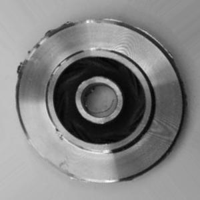

In [2]:
#read the image
im = Image.open("/content/drive/MyDrive/project/manufacturing/data/casting_data/train/def_front/cast_def_0_19.jpeg")
#im = Image.open("/content/drive/MyDrive/project/manufacturing/data/casting_data/train/ok_front/cast_ok_0_9.jpeg")
im_array = np.array(im)
resized_im = im.resize((200,200))
resized_im

## addition and subtraction

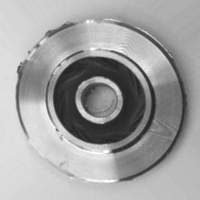

In [3]:
# addition(밝게)
im_add = np.clip(im_array.astype(np.int)+30,0,255)
Image.fromarray(im_add.astype(np.uint8)).resize((200,200))

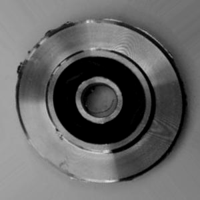

In [4]:
# subtraction(어둡게)
im_add = np.clip(im_array.astype(np.int)-30,0,255)
Image.fromarray(im_add.astype(np.uint8)).resize((200,200))

## contrast adjustment

이미지 대조 방법

In [5]:
# image brightness enhancer
enhancer = ImageEnhance.Contrast(im)

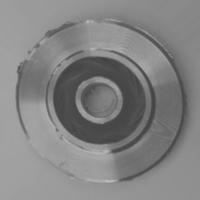

In [6]:
factor = 0.5 # decrease contrast
im_output = enhancer.enhance(factor)
im_output.resize((200,200))

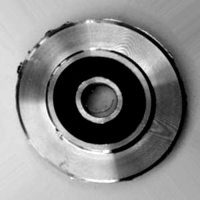

In [7]:
factor = 1.5 # decrease contrast
im_output2 = enhancer.enhance(factor)
im_output2.resize((200,200))

## Histogram equalization

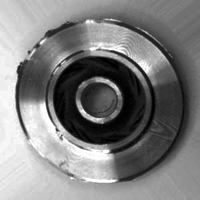

In [8]:
im_hist = ImageOps.equalize(im,mask=None)
im_hist.resize((200,200))

## gray scale

해당 이미지가 원래 흑백 이미지로 보여지고 채널 수가 많다는 생각이 들어 gray scale진행하면 좋겠다는 생각이 듦

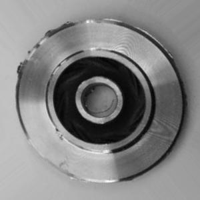

In [9]:
im_gray = resized_im.convert('L')
im_gray_array =  np.array(im_gray)
im_gray

In [10]:
resized_im_array = np.array(resized_im)

Text(0.5, 1.0, 'gray scaled image')

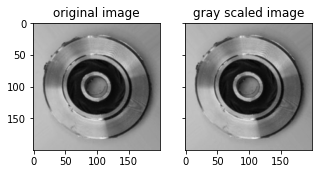

In [11]:
f, axes = plt.subplots(1, 2, sharex=True, sharey=True)
f.set_size_inches((5, 5))

axes[0].imshow(resized_im_array)
axes[0].set_title("original image")

axes[1].imshow(im_gray_array, cmap='gray', vmin=0, vmax=255)
axes[1].set_title("gray scaled image")

제조업 데이터 : https://buw.medium.com/%EB%94%A5-%EB%9F%AC%EB%8B%9D-%EA%B8%B0%EB%B0%98-%EC%BB%B4%ED%93%A8%ED%84%B0-%EB%B9%84%EC%A0%84%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-%EC%A0%9C%EC%A1%B0-%ED%92%88%EC%A7%88-%EA%B2%80%EC%82%AC-e205822bc181

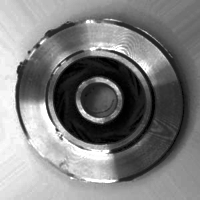

In [12]:
im_gray_hist = ImageOps.equalize(im_gray,mask=None)
im_gray_hist

# edge detection : 윤곽선

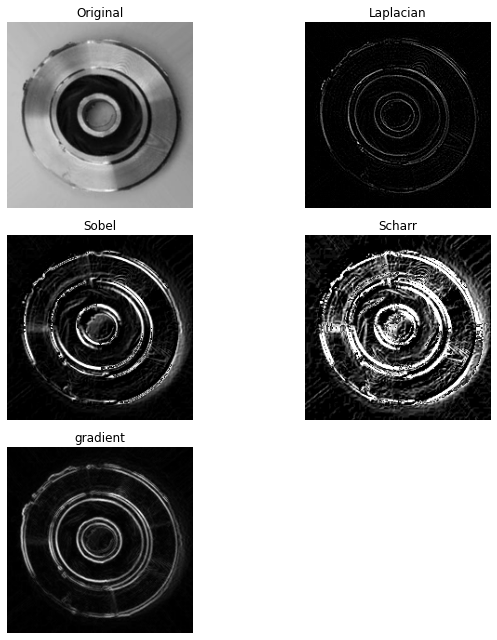

제품 결합을 나타내면 노이즈가 많고, 노이즈가 거의 없다면 제품 결함도 보이지 않음


In [13]:
img = im_gray_array

sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)

scharrx = cv2.Scharr(img, cv2.CV_8U, 1, 0)
scharry = cv2.Scharr(img, cv2.CV_8U, 0, 1)

#sobelx = cv2.Sobel(img, -1, 1, 0, ksize=-1)
#sobely = cv2.Sobel(img, -1, 0, 1, ksize=-1)

laplacian = cv2.Laplacian(img, cv2.CV_8U)

gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, 
    cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
)

plt.figure(figsize=(9, 9))
plt.subplot(3, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")
plt.subplot(3, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis("off")
plt.subplot(3, 2, 3)
plt.imshow(sobelx+sobely, cmap='gray')
plt.title('Sobel')
plt.axis("off")
plt.subplot(3, 2, 4)
plt.imshow(scharrx+scharry, cmap='gray')
plt.title('Scharr')
plt.axis("off")
plt.subplot(3, 2, 5)
plt.imshow(gradient, cmap='gray')
plt.title('gradient')
plt.axis("off")

plt.tight_layout()
plt.show()
print('제품 결합을 나타내면 노이즈가 많고, 노이즈가 거의 없다면 제품 결함도 보이지 않음')

# 가우시안 블러 처리

<Figure size 648x648 with 0 Axes>

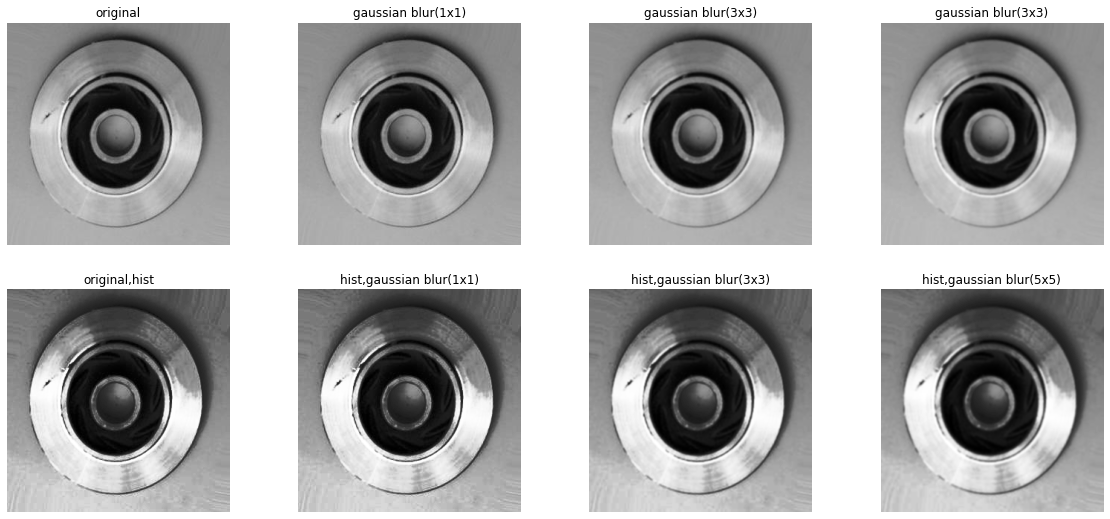

<Figure size 432x288 with 0 Axes>

In [14]:
import cv2

img_ = cv2.imread('/content/drive/MyDrive/project/manufacturing/data/casting_data/train/def_front/cast_def_0_21.jpeg',0)
#img_ = cv2.imread("/content/drive/MyDrive/project/manufacturing/data/casting_data/train/ok_front/cast_ok_0_9.jpeg",0)

#img_rgb = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
#img_ = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

hist_img = cv2.equalizeHist(img_)

blur_1 = cv2.GaussianBlur(img_, (1,1), 0)
blur_3 = cv2.GaussianBlur(img_, (3,3), 0)
blur_5 = cv2.GaussianBlur(img_, (5,5), 0)

hist_blur_1 = cv2.GaussianBlur(hist_img, (1,1), 0)
hist_blur_3 = cv2.GaussianBlur(hist_img, (3,3), 0)
hist_blur_5 = cv2.GaussianBlur(hist_img, (5,5), 0)

plt.figure(figsize=(9, 9))

plt_name = ['original','gaussian blur(1x1)','gaussian blur(3x3)','gaussian blur(3x3)','original,hist','hist,gaussian blur(1x1)','hist,gaussian blur(3x3)','hist,gaussian blur(5x5)']
plt_img = [img_,blur_1,blur_3,blur_5,hist_img, hist_blur_1,hist_blur_3,hist_blur_5]

plt.figure(figsize=(20, 9))

for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.imshow(plt_img[i], cmap='gray')
  plt.title(plt_name[i])
  plt.axis("off")

plt.show()

plt.tight_layout()
plt.show()

In [19]:
img_

array([[135, 135, 135, ..., 137, 137, 137],
       [136, 136, 136, ..., 137, 137, 137],
       [138, 138, 138, ..., 137, 137, 137],
       ...,
       [171, 169, 168, ..., 168, 168, 168],
       [171, 169, 168, ..., 169, 169, 169],
       [171, 169, 168, ..., 170, 170, 170]], dtype=uint8)

# 가우시안 블러 adaptive threshold

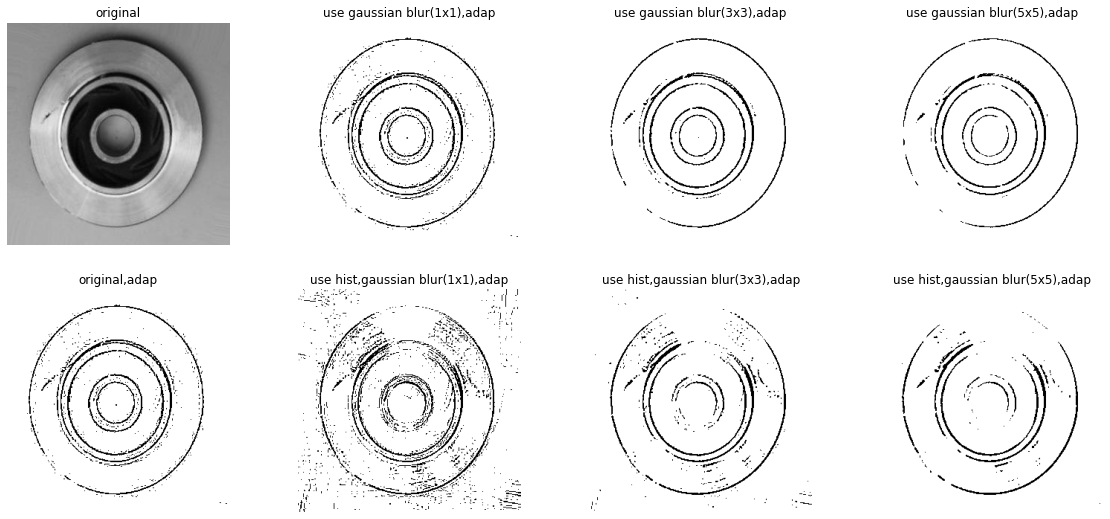

이미지 특징(결함) 잘 살린 것 : original-adap, hist-gaussian blur(3x3)-adap
하지만, hist를 사용하면 확실히 경계선이 뚜렷하지 않아 이거를 보고 오해할 수 있을 것 같음. 어느정도 노이즈가 있더라도 그냥 original에 adap을 쓰는 것이 제일 좋은 듯
다른 이미지도 한번 해보았을 때, 이미지마다 좋은 필터가 달랐다. 하지만 original에 한것은 언제나 특징을 살림.


In [15]:
maxval = 255
thresh = 0

k = 5
C = 5

th = cv2.adaptiveThreshold(
    img_, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

th_1 = cv2.adaptiveThreshold(
    blur_1, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)
th_3 = cv2.adaptiveThreshold(
    blur_3, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)
th_5 = cv2.adaptiveThreshold(
    blur_5, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

hist_th_1 = cv2.adaptiveThreshold(
    hist_blur_1, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)
hist_th_3 = cv2.adaptiveThreshold(
    hist_blur_3, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)
hist_th_5 = cv2.adaptiveThreshold(
    hist_blur_5, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)

plt_name = ['original','use gaussian blur(1x1),adap','use gaussian blur(3x3),adap','use gaussian blur(5x5),adap','original,adap','use hist,gaussian blur(1x1),adap','use hist,gaussian blur(3x3),adap','use hist,gaussian blur(5x5),adap']
plt_img = [img_,th_1,th_3,th_5,th,hist_th_1,hist_th_3,hist_th_5]

plt.figure(figsize=(20, 9))

for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.imshow(plt_img[i], cmap='gray')
  plt.title(plt_name[i])
  plt.axis("off")

plt.show()

#print('일부러 특징이 잘 잡히나 보려고 품질이 좋은 것인지 아닌지 헷갈리는 것을 위주로 확인해봄')
print('이미지 특징(결함) 잘 살린 것 : original-adap, hist-gaussian blur(3x3)-adap')
print('하지만, hist를 사용하면 확실히 경계선이 뚜렷하지 않아 이거를 보고 오해할 수 있을 것 같음. 어느정도 노이즈가 있더라도 그냥 original에 adap을 쓰는 것이 제일 좋은 듯')
print('다른 이미지도 한번 해보았을 때, 이미지마다 좋은 필터가 달랐다. 하지만 original에 한것은 언제나 특징을 살림.')


생각하는 방향 : gray -> hist -> gradient적용 or 가우시안 블러 임계값 적용 사용

실제 채택한 방향 : gray -> adaptive threshold using gaussian blur(c=5,k=5)

근데 빛에 의한 것도 처리할 수 있으면 좋을 것 같음 - 의미 없는듯

참고 : https://datascienceschool.net/03%20machine%20learning/03.02.02%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%ED%95%84%ED%84%B0%EB%A7%81.html

<질문>

729는 왜 def?

## 이미지 광원 줄이기

high-pass filter

In [16]:
def imclearborder(imgBW, radius):

    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # Get dimensions of image
    imgRows = imgBW.shape[0]
    imgCols = imgBW.shape[1]    

    contourList = [] # ID list of contours that touch the border

    # For each contour...
    for idx in np.arange(len(contours)):
        # Get the i'th contour
        cnt = contours[idx]

        # Look at each point in the contour
        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]

            # If this is within the radius of the border
            # this contour goes bye bye!
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows-1-radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols-1-radius and colCnt < imgCols)

            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

#### bwareaopen definition
def bwareaopen(imgBW, areaPixels):
    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # For each contour, determine its total occupying area
    for idx in np.arange(len(contours)):
        area = cv2.contourArea(contours[idx])
        if (area >= 0 and area <= areaPixels):
            cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead


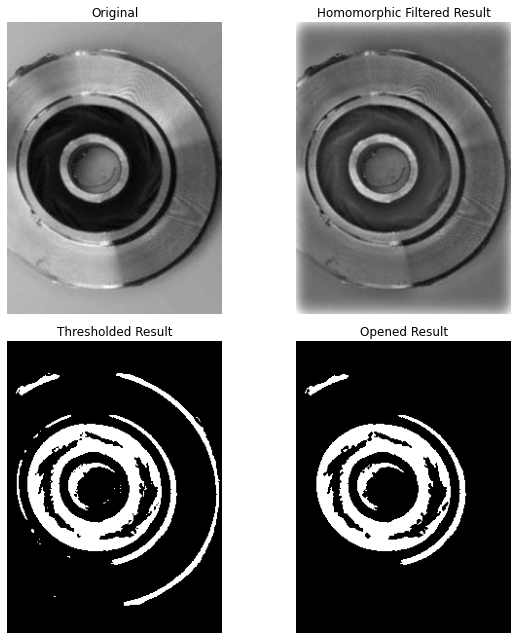

In [17]:
import scipy.fftpack # For FFT2 

img = cv2.imread('/content/drive/MyDrive/project/manufacturing/data/casting_data/train/def_front/cast_def_0_19.jpeg', 0)

# Number of rows and columns
rows = img.shape[0]
cols = img.shape[1]

# Remove some columns from the beginning and end
img = img[:, 59:cols-20]

# Number of rows and columns
rows = img.shape[0]
cols = img.shape[1]

# Convert image to 0 to 1, then do log(1 + I)
imgLog = np.log1p(np.array(img, dtype="float") / 255)

# Create Gaussian mask of sigma = 10
M = 2*rows + 1
N = 2*cols + 1
sigma = 10
(X,Y) = np.meshgrid(np.linspace(0,N-1,N), np.linspace(0,M-1,M))
centerX = np.ceil(N/2)
centerY = np.ceil(M/2)
gaussianNumerator = (X - centerX)**2 + (Y - centerY)**2

# Low pass and high pass filters
Hlow = np.exp(-gaussianNumerator / (2*sigma*sigma))
Hhigh = 1 - Hlow

# Move origin of filters so that it's at the top left corner to
# match with the input image
HlowShift = scipy.fftpack.ifftshift(Hlow.copy())
HhighShift = scipy.fftpack.ifftshift(Hhigh.copy())

# Filter the image and crop
If = scipy.fftpack.fft2(imgLog.copy(), (M,N))
Ioutlow = scipy.real(scipy.fftpack.ifft2(If.copy() * HlowShift, (M,N)))
Iouthigh = scipy.real(scipy.fftpack.ifft2(If.copy() * HhighShift, (M,N)))

# Set scaling factors and add
gamma1 = 0.3
gamma2 = 1.5
Iout = gamma1*Ioutlow[0:rows,0:cols] + gamma2*Iouthigh[0:rows,0:cols]

# Anti-log then rescale to [0,1]
Ihmf = np.expm1(Iout)
Ihmf = (Ihmf - np.min(Ihmf)) / (np.max(Ihmf) - np.min(Ihmf))
Ihmf2 = np.array(255*Ihmf, dtype="uint8")

# Threshold the image - Anything below intensity 65 gets set to white
Ithresh = Ihmf2 < 65
Ithresh = 255*Ithresh.astype("uint8")

# Clear off the border.  Choose a border radius of 5 pixels
Iclear = imclearborder(Ithresh, 5)

# Eliminate regions that have areas below 120 pixels
Iopen = bwareaopen(Iclear, 120)

# Show all images
'''
cv2.imshow('Original Image', img)
cv2.imshow('Homomorphic Filtered Result', Ihmf2)
cv2.imshow('Thresholded Result', Ithresh)
cv2.imshow('Opened Result', Iopen)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

plt.figure(figsize=(9, 9))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(Ihmf2, cmap='gray')
plt.title('Homomorphic Filtered Result')
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(Ithresh, cmap='gray')
plt.title('Thresholded Result')
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(Iopen, cmap='gray')
plt.title('Opened Result')
plt.axis("off")

plt.tight_layout()
plt.show()